In [34]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.preprocessing import image
import cv2
import tensorflow as tf
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import re
import random

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
from tensorflow.keras.preprocessing import image

In [37]:
data_directory = r"C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification"

Image path: C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification\clothes\clothes2124.jpg


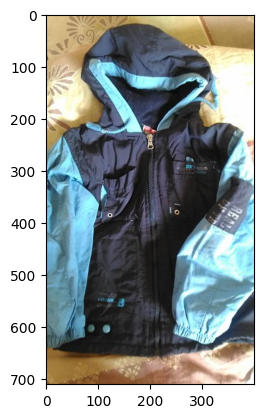

In [38]:
subfolders = os.listdir(data_directory)
random_subfolder = random.choice(subfolders)
subfolder_path = os.path.join(data_directory, random_subfolder)

random_file = random.choice(os.listdir(subfolder_path))

image_path = os.path.join(subfolder_path, random_file)
random_image = image.load_img(image_path)
print('Image path:', image_path)
plt.imshow(random_image)
plt.show()


In [39]:
garbage_types_labels = {
    'battery': 'battery',
    'biological': 'biological',
    'brown-glass': 'brown-glass',
    'cardboard': 'cardboard',
    'clothes': 'clothes',
    'green-glass': 'green-glass',
    'metal': 'metal',
    'paper': 'paper',
    'plastic': 'plastic',
    'shoes': 'shoes',
    'trash': 'trash'
}

In [56]:
import os
import pandas as pd

garbage_types_labels = [
    'battery', 'biological', 'brown-glass', 'cardboard', 'clothes',
    'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash'
]

filenames_list = []
categories_list = []

for item in garbage_types_labels:
    filenames = os.listdir(os.path.join(data_directory, item))

    filenames_list += filenames
    categories_list += [item] * len(filenames)

df = pd.DataFrame({'Image': filenames_list, 'Garbage_category': categories_list})
df

,Image,Garbage_category
0,battery1.jpg,battery
1,battery10.jpg,battery
2,battery100.jpg,battery
3,battery101.jpg,battery
4,battery102.jpg,battery
...,...,...
14735,trash95.jpg,trash
14736,trash96.jpg,trash
14737,trash97.jpg,trash
14738,trash98.jpg,trash


Hereby we are going to create a dataframe with with each photo:
- We create a list (filenames_list) with all the filenames in the dataset.
- We create a list to store the corresponding category (categories_list). To take into account that each folder of the dataset has one class of data
- We do a for loop with all the files on the folders to loop each element of the dictionary with all our garbage types. The loop obtains the name slist of each file and store them in (filenames). The same for categories (categories_list) storages the list of categories as much of times that the categories is present in the files.
- Then, we create the df wit two columns 'Image'and'Garbage_category'.
- Finally, we create a fx (def file_rename) to create a prefix to each file. This will help us in the next steps to model and analyse each file.

In [40]:
filenames_list = []
categories_list = []

for item in garbage_types_labels:
    filenames = os.listdir(data_directory + "/" + str(garbage_types_labels[item]))
    
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [item] * len(filenames)
    
df = pd.DataFrame({'Image': filenames_list,'Garbage_category': categories_list})

In [41]:
df

,Image,Garbage_category
0,battery1.jpg,battery
1,battery10.jpg,battery
2,battery100.jpg,battery
3,battery101.jpg,battery
4,battery102.jpg,battery
...,...,...
14735,trash95.jpg,trash
14736,trash96.jpg,trash
14737,trash97.jpg,trash
14738,trash98.jpg,trash


In [42]:
def file_rename(df, col_name):
    df[col_name] = df[col_name].astype(str).apply(lambda x: x[:re.search("\d", str(x)).start()] + '/' + str(x))
    return df

In [43]:
df=file_rename(df, 'Image')
df

,Image,Garbage_category
0,battery/battery1.jpg,battery
1,battery/battery10.jpg,battery
2,battery/battery100.jpg,battery
3,battery/battery101.jpg,battery
4,battery/battery102.jpg,battery
...,...,...
14735,trash/trash95.jpg,trash
14736,trash/trash96.jpg,trash
14737,trash/trash97.jpg,trash
14738,trash/trash98.jpg,trash


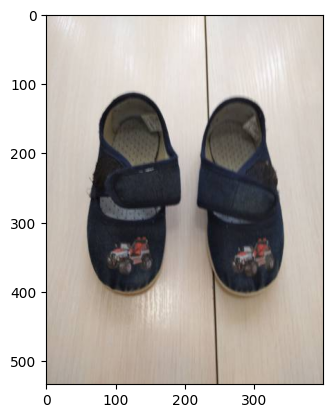

In [44]:
random_row = random.randint(0, len(df) - 1)
sample = df.iloc[random_row]
image_path = os.path.join(data_directory, sample['Image'])
random_image = image.load_img(image_path)
plt.imshow(random_image)
plt.show()

In [45]:
duplicates_exist = df.duplicated().any()
print(duplicates_exist)

False


In [46]:
nulls=df.isnull().any()
print(nulls)

Image               False
Garbage_category    False
dtype: bool


In [47]:
def split_data(df, ratio):
    train_data, test_data = train_test_split(df, test_size=(1 - ratio), shuffle=True)
    return train_data, test_data

In [50]:
train_data, test_data = split_data(df, 0.8)

In [52]:
train_data

,Image,Garbage_category
4507,clothes/clothes1970.jpg,clothes
2124,brown-glass/brown-glass274.jpg,brown-glass
10087,metal/metal734.jpg,metal
9284,green-glass/green-glass578.jpg,green-glass
3629,clothes/clothes118.jpg,clothes
...,...,...
12140,shoes/shoes1065.jpg,shoes
8461,clothes/clothes736.jpg,clothes
6805,clothes/clothes4038.jpg,clothes
10422,paper/paper298.jpg,paper


In [53]:
test_data

,Image,Garbage_category
6853,clothes/clothes4081.jpg,clothes
5730,clothes/clothes3070.jpg,clothes
13175,shoes/shoes217.jpg,shoes
12233,shoes/shoes1149.jpg,shoes
13965,shoes/shoes929.jpg,shoes
...,...,...
8608,clothes/clothes869.jpg,clothes
5304,clothes/clothes2688.jpg,clothes
9301,green-glass/green-glass593.jpg,green-glass
6406,clothes/clothes368.jpg,clothes


In [51]:
#train_data.to_csv('train.csv', index=False)
#test_data.to_csv('test.csv',index=False)

In [54]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate model accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/10
469/469 [==============================] - 46s 92ms/step - loss: 0.1877 - accuracy: 0.9459 - val_loss: 0.0727 - val_accuracy: 0.9781
Epoch 2/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0548 - val_accuracy: 0.9814
Epoch 3/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0519 - val_accuracy: 0.9826
Epoch 4/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 5/10
469/469 [==============================] - 44s 95ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0475 - val_accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0540 - val_accuracy: 0.9842
Epoch 7/10
469/469 [==============================] 